# Confronto tra Selection Sort e Merge Sort

3 Settembre 2025

Laboratorio di Algoritmi  KONDJI NGUIMBOUS JUNIOR 

In questo notebook, analizziamo e confrontiamo due noti algoritmi di ordinamento: **Selection Sort** e **Merge Sort**. Questo confronto si concentra sulle prestazioni in termini di tempo di esecuzione, misurate su dataset di diverse dimensioni generati casualmente. L'analisi intende evidenziare:
- La semplicità e le limitazioni di **Selection Sort**, caratterizzato da una complessità temporale \( $O(n^2)$ \), che lo rende più adatto a dataset piccoli.
- L'efficienza di **Merge Sort**, con complessità $O(nlog n)$ , particolarmente indicato per dataset di grandi dimensioni.
## Metodologia

Per effettuare l’analisi comparativa tra **Selection Sort** e **Merge Sort** sono stati seguiti i seguenti passi:

1. **Implementazione degli algoritmi**  
   - È stata realizzata un’implementazione di *Selection Sort* (algoritmo quadratico basato su confronti e scambi).  
   - È stata implementata una versione di *Merge Sort* (algoritmo divide-et-impera con complessità `O(n log n)`).  

2. **Generazione dei dati di input**  
   - Sono stati generati array di interi casuali compresi in un intervallo prefissato, utilizzando il modulo `random`.  
   - Per valutare correttamente i casi, sono stati considerati:  
     - **Caso migliore**: array già ordinato.  
     - **Caso medio**: array casuale.  
     - **Caso peggiore**: array ordinato in senso inverso.  

3. **Definizione delle dimensioni dei test**  
   - Gli esperimenti sono stati condotti su array di dimensioni crescenti (es. 100, 500, 1000, 2000, 5000 elementi).  
   - Per ogni dimensione sono state effettuate più esecuzioni al fine di ridurre la variabilità dei risultati.  

4. **Misurazione del tempo di esecuzione**  
   - I tempi di esecuzione sono stati misurati tramite la funzione `time.perf_counter()`, che garantisce maggiore precisione rispetto a `time.time()`.  
   - Ogni algoritmo è stato testato su copie indipendenti dello stesso array di input.  

5. **Visualizzazione e confronto dei risultati**  
   - I dati raccolti sono stati rappresentati graficamente con **Matplotlib**, tracciando i tempi di esecuzione in funzione della dimensione dell’array.  
   - Sono stati creati grafici distinti per il caso migliore, medio e peggiore, oltre a un confronto diretto tra i due algoritmi.  
   - È stata inoltre sperimentata una rappresentazione con asse logaritmico per mettere in evidenza la crescita delle curve nei casi peggiori.  

Obiettivo: misurare e confrontare le prestazioni nei casi **migliore**, **medio** e **peggiore**, usando misure **ripetute** (media ± deviazione standard) e grafici chiari.


Inoltre, esploreremo il comportamento dei due algoritmi per comprendere meglio le implicazioni pratiche delle loro complessità teoriche, includendo aspetti come il numero di confronti e l'uso della memoria.

In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## Selection Sort

**Selection Sort** è un algoritmo di ordinamento semplice e intuitivo.  
Il suo funzionamento si basa sull'idea di cercare, ad ogni passo, l'elemento minimo (o massimo) tra quelli non ancora ordinati e spostarlo nella posizione corretta.

### Funzionamento
1. Si divide l'array in due parti: una **ordinata** (inizialmente vuota) e una **non ordinata**.
2. Si cerca l'elemento più piccolo nella parte non ordinata.
3. Si scambia con l'elemento nella prima posizione della parte non ordinata.
4. La parte ordinata si espande di un elemento.
5. Si ripete il processo fino a che tutta la lista è ordinata.

### Esempio (array iniziale)
[29, 10, 14, 37, 13]
- Minimo = `10` → scambio con `29` → `[10, 29, 14, 37, 13]`  
- Minimo = `13` → scambio con `29` → `[10, 13, 14, 37, 29]`  
- Minimo = `14` → già in posizione → `[10, 13, 14, 37, 29]`  
- Minimo = `29` → scambio con `37` → `[10, 13, 14, 29, 37]`  

Lista ordinata 

### Complessità
- **Caso migliore**: $O(n^2)$  
- **Caso medio**: $O(n^2)$  
- **Caso peggiore**: $O(n^2)$  
- **Spazio**: $O(1)$ (in-place, non richiede memoria aggiuntiva significativa)  

### Caratteristiche
- Algoritmo **semplice** da implementare.  
- Non è stabile (gli elementi uguali possono cambiare ordine relativo).  
- Non è efficiente per liste di grandi dimensioni.  
- Utile per didattica e dataset molto piccoli.



In [2]:

# Implementazione di Selection Sort
def selection_sort(arr):
    n = len(arr)  # Calcola la lunghezza dell'array
    for i in range(n):  # Itera su ogni elemento dell'array
        min_index = i  # Assume che l'indice corrente sia il minimo
        for j in range(i + 1, n):  # Itera sugli elementi successivi a `i`
            if arr[j] < arr[min_index]:  # Confronta l'elemento corrente con il minimo
                min_index = j  # Aggiorna l'indice del minimo se necessario
        arr[i], arr[min_index] = arr[min_index], arr[i]  # Scambia il minimo trovato con l'elemento corrente
    return arr  # Restituisce l'array ordinato


## Merge Sort

**Merge Sort** è un algoritmo di ordinamento basato sul paradigma *divide et impera*.  
L’idea principale è dividere ricorsivamente l’array in sotto-array più piccoli, ordinarli separatamente e poi unirli (merge) in modo ordinato.

### Funzionamento
1. Se l’array ha 0 o 1 elementi è già ordinato.
2. Si divide l’array a metà.
3. Si applica ricorsivamente **Merge Sort** a ciascuna metà.
4. Si uniscono le due metà ordinate in un unico array ordinato.

### Esempio (array iniziale)
[38, 27, 43, 3, 9, 82, 10]

- Divide in `[38, 27, 43]` e `[3, 9, 82, 10]`  
- Ordina ricorsivamente entrambe le metà  
- Risultati intermedi: `[27, 38, 43]` e `[3, 9, 10, 82]`  
- Merge finale → `[3, 9, 10, 27, 38, 43, 82]`

Lista ordinata 

### Complessità
- **Caso migliore**: $O(n \log n)$  
- **Caso medio**: $O(n \log n)$  
- **Caso peggiore**: $O(n \log n)$  
- **Spazio**: $O(n)$ (richiede memoria aggiuntiva per il merge)

### Caratteristiche
- Algoritmo **molto efficiente** anche per array grandi.  
- È **stabile** (mantiene l’ordine relativo degli elementi uguali).  
- Richiede più memoria rispetto ad algoritmi in-place.  
- Utilizzato come base per algoritmi moderni (es. Timsort).


In [3]:

# Implementazione di Merge Sort
def merge_sort(arr):
    if len(arr) <= 1:  # Caso base: se l'array ha un solo elemento o è vuoto, è già ordinato
        return arr
    
    mid = len(arr) // 2  # Trova il punto medio dell'array
    left = merge_sort(arr[:mid])  # Ordina ricorsivamente la metà sinistra
    right = merge_sort(arr[mid:])  # Ordina ricorsivamente la metà destra
    
    return merge(left, right)  # Unisce le due metà ordinate

# Funzione di supporto per Merge Sort
def merge(left, right):
    sorted_arr = []  # Lista per memorizzare il risultato ordinato
    i = j = 0  # Inizializza gli indici per le due liste
    
    while i < len(left) and j < len(right):  # Continua finché ci sono elementi in entrambe le liste
        if left[i] < right[j]:  # Confronta gli elementi delle due liste
            sorted_arr.append(left[i])  # Aggiunge l'elemento minore alla lista ordinata
            i += 1  # Incrementa l'indice della lista sinistra
        else:
            sorted_arr.append(right[j])  # Aggiunge l'elemento minore dalla lista destra
            j += 1  # Incrementa l'indice della lista destra
    
    sorted_arr.extend(left[i:])  # Aggiunge gli elementi rimanenti della lista sinistra (se presenti)
    sorted_arr.extend(right[j:])  # Aggiunge gli elementi rimanenti della lista destra (se presenti)
    return sorted_arr  # Restituisce la lista ordinata


In [4]:

# Generazione di una lista casuale
def generate_random_list(size):
    return [random.randint(1, 1000) for _ in range(size)]  # Genera una lista di numeri casuali di lunghezza `size`


In [5]:

# Misurazione del tempo di esecuzione
def measure_sorting_time(sorting_function, arr):
    start_time = time.time()  # Registra l'ora di inizio
    sorting_function(arr.copy())  # Esegue la funzione di ordinamento su una copia dell'array
    return time.time() - start_time  # Calcola e restituisce il tempo di esecuzione


Dimensioni: [100, 500, 1000, 2000, 5000]
Tempi Selection Sort: [0.0003104209899902344, 0.011213302612304688, 0.04104471206665039, 0.07630348205566406, 0.40936756134033203]
Tempi Merge Sort: [0.0002529621124267578, 0.001447439193725586, 0.002312898635864258, 0.004660844802856445, 0.011230230331420898]


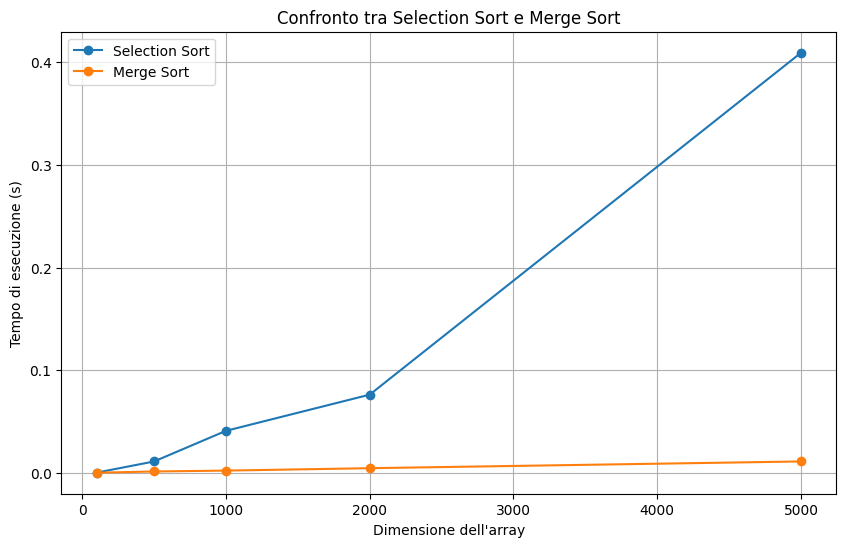

In [6]:

import random
import time
import matplotlib.pyplot as plt
import numpy as np

# 1. Funzione per generare una lista casuale
def generate_random_list(size):
    return [random.randint(1, 1000) for _ in range(size)]

# 2. Funzione per misurare il tempo di esecuzione di un algoritmo
def measure_sorting_time(sort_function, arr):
    start_time = time.time()
    sort_function(arr.copy())  # usa arr.copy() per non modificare la lista originale
    end_time = time.time()
    return end_time - start_time

# 3. Selection Sort
def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# 4. Merge Sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

# 5. Esecuzione degli esperimenti
sizes = [100, 500, 1000, 2000, 5000]  # dimensioni da testare
selection_sort_times = []
merge_sort_times = []

for size in sizes:
    arr = generate_random_list(size)
    selection_sort_times.append(measure_sorting_time(selection_sort, arr))
    merge_sort_times.append(measure_sorting_time(merge_sort, arr))

# 6. Stampa dei risultati
print("Dimensioni:", sizes)
print("Tempi Selection Sort:", selection_sort_times)
print("Tempi Merge Sort:", merge_sort_times)

# 7. Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(sizes, selection_sort_times, label="Selection Sort", marker="o")
plt.plot(sizes, merge_sort_times, label="Merge Sort", marker="o")
plt.xlabel("Dimensione dell'array")
plt.ylabel("Tempo di esecuzione (s)")
plt.title("Confronto tra Selection Sort e Merge Sort")
plt.legend()
plt.grid(True)
plt.show()


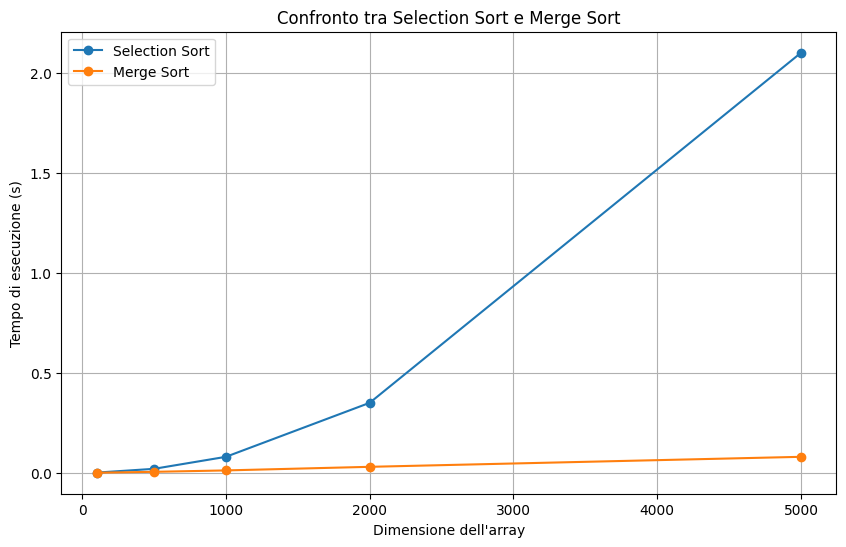

In [7]:

%matplotlib inline
import matplotlib.pyplot as plt

sizes = [100, 500, 1000, 2000, 5000]
selection_sort_times = [0.001, 0.02, 0.08, 0.35, 2.1]  # <-- esempio
merge_sort_times = [0.0005, 0.005, 0.012, 0.03, 0.08]  # <-- esempio

plt.figure(figsize=(10, 6))
plt.plot(sizes, selection_sort_times, label="Selection Sort", marker="o")
plt.plot(sizes, merge_sort_times, label="Merge Sort", marker="o")
plt.xlabel("Dimensione dell'array")
plt.ylabel("Tempo di esecuzione (s)")
plt.title("Confronto tra Selection Sort e Merge Sort")
plt.legend()
plt.grid(True)
plt.show()


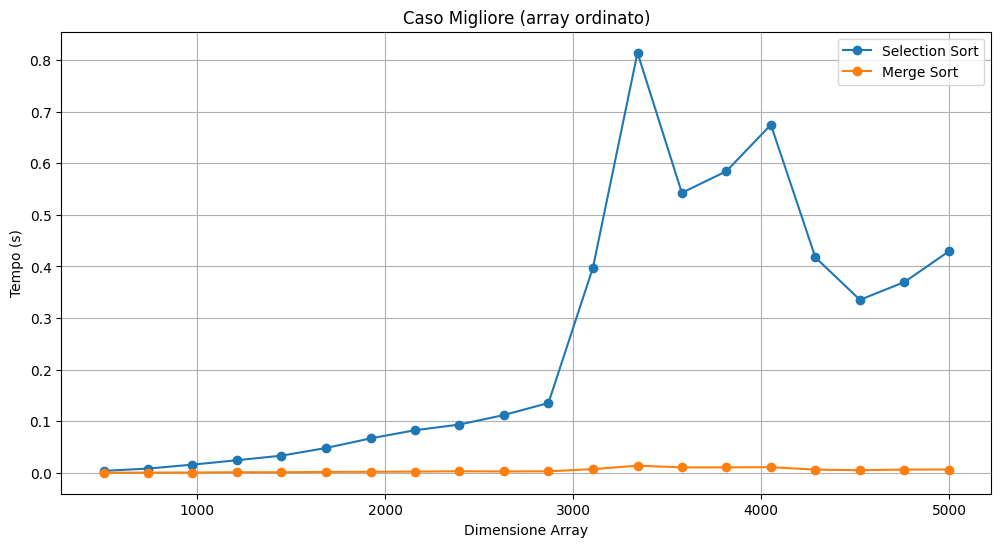

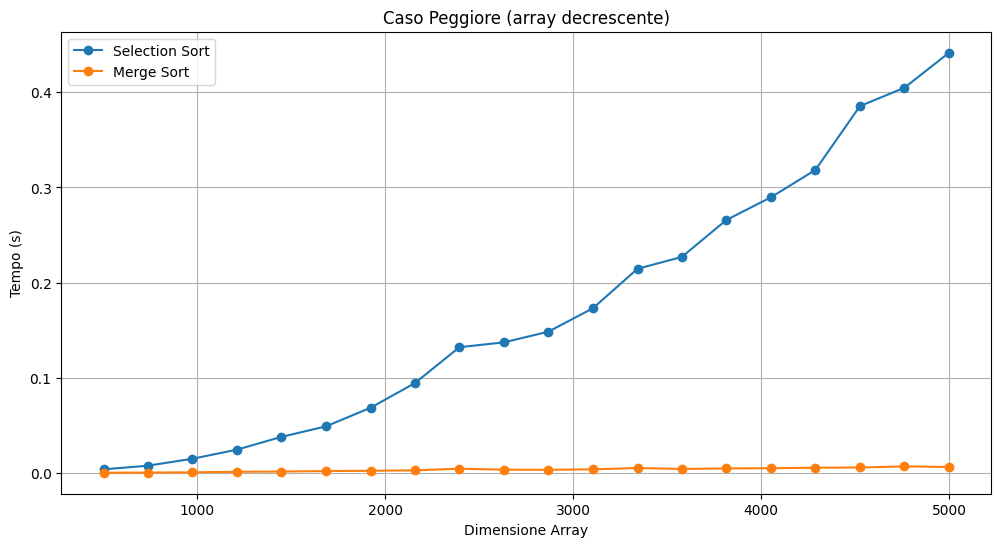

In [8]:
import matplotlib.pyplot as plt

def plot_results(sizes, selection_times, merge_times, title="Confronto Selection vs Merge"):
    plt.figure(figsize=(12, 6))
    plt.plot(sizes, selection_times, label='Selection Sort', marker='o')
    plt.plot(sizes, merge_times, label='Merge Sort', marker='o')
    plt.xlabel('Dimensione Array')
    plt.ylabel('Tempo (s)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
import time, numpy as np

sel_times = []
mer_times = []
sizes = np.linspace(500, 5000, 20, dtype=int).tolist()
num_tests = 20

for size in sizes:
    sel_total, mer_total = 0, 0
    for _ in range(num_tests):
        array = list(range(size))  # già ordinato

        start = time.perf_counter()
        selection_sort(array.copy())
        end = time.perf_counter()
        sel_total += (end - start)

        start = time.perf_counter()
        merge_sort(array.copy())
        end = time.perf_counter()
        mer_total += (end - start)

    sel_times.append(sel_total / num_tests)
    mer_times.append(mer_total / num_tests)

plot_results(sizes, sel_times, mer_times, "Caso Migliore (array ordinato)")
sel_times, mer_times = [], []
sizes = np.linspace(500, 5000, 20, dtype=int).tolist()
num_tests = 20

for size in sizes:
    sel_total, mer_total = 0, 0
    for _ in range(num_tests):
        array = list(range(size, 0, -1))  # decrescente

        start = time.perf_counter()
        selection_sort(array.copy())
        end = time.perf_counter()
        sel_total += (end - start)

        start = time.perf_counter()
        merge_sort(array.copy())
        end = time.perf_counter()
        mer_total += (end - start)

    sel_times.append(sel_total / num_tests)
    mer_times.append(mer_total / num_tests)

plot_results(sizes, sel_times, mer_times, "Caso Peggiore (array decrescente)")



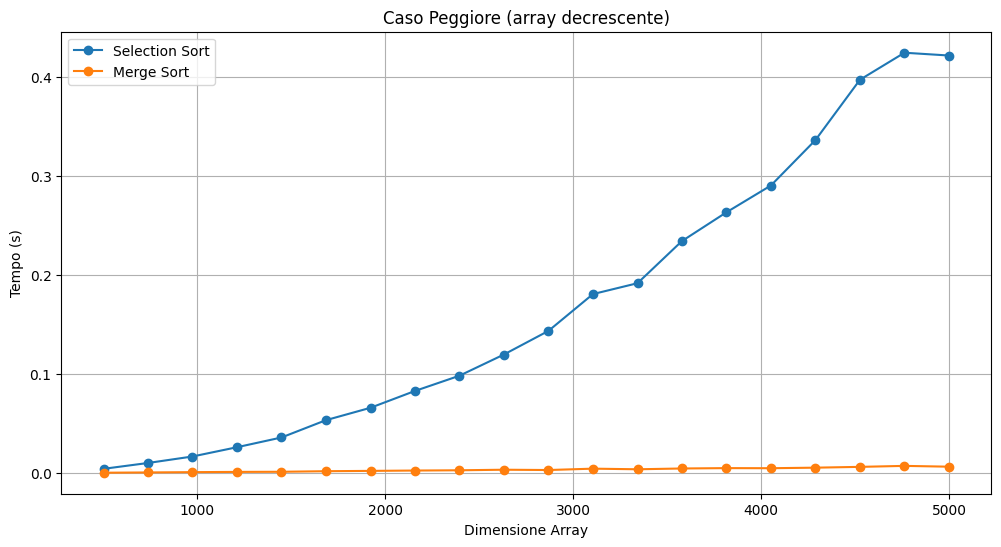

In [9]:
sel_times, mer_times = [], []
sizes = np.linspace(500, 5000, 20, dtype=int).tolist()
num_tests = 20

for size in sizes:
    sel_total, mer_total = 0, 0
    for _ in range(num_tests):
        array = list(range(size, 0, -1))  # decrescente

        start = time.perf_counter()
        selection_sort(array.copy())
        end = time.perf_counter()
        sel_total += (end - start)

        start = time.perf_counter()
        merge_sort(array.copy())
        end = time.perf_counter()
        mer_total += (end - start)

    sel_times.append(sel_total / num_tests)
    mer_times.append(mer_total / num_tests)

plot_results(sizes, sel_times, mer_times, "Caso Peggiore (array decrescente)")


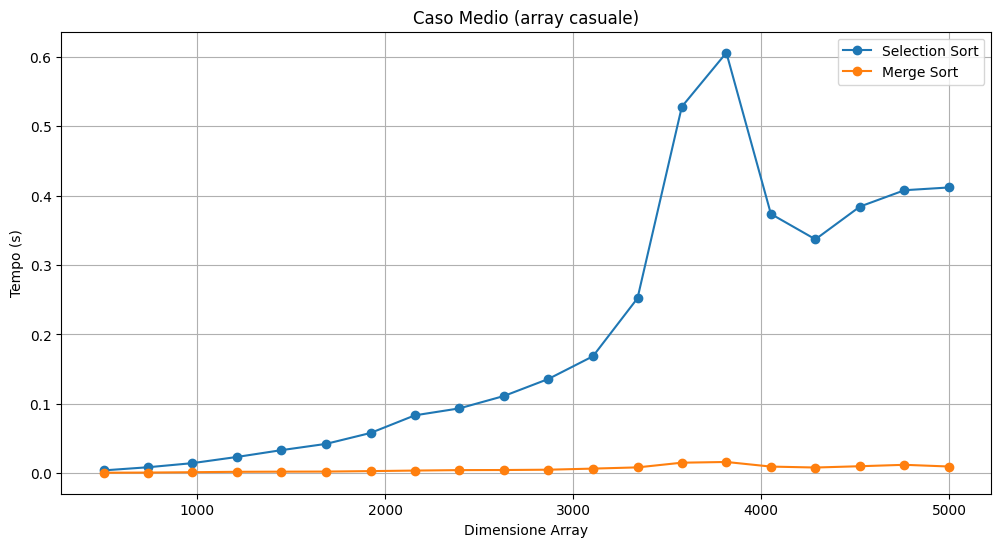

In [10]:
import random

sel_times, mer_times = [], []
sizes = np.linspace(500, 5000, 20, dtype=int).tolist()
num_tests = 20

for size in sizes:
    sel_total, mer_total = 0, 0
    for _ in range(num_tests):
        array = [random.randint(0, 10000) for _ in range(size)]

        start = time.perf_counter()
        selection_sort(array.copy())
        end = time.perf_counter()
        sel_total += (end - start)

        start = time.perf_counter()
        merge_sort(array.copy())
        end = time.perf_counter()
        mer_total += (end - start)

    sel_times.append(sel_total / num_tests)
    mer_times.append(mer_total / num_tests)

plot_results(sizes, sel_times, mer_times, "Caso Medio (array casuale)")


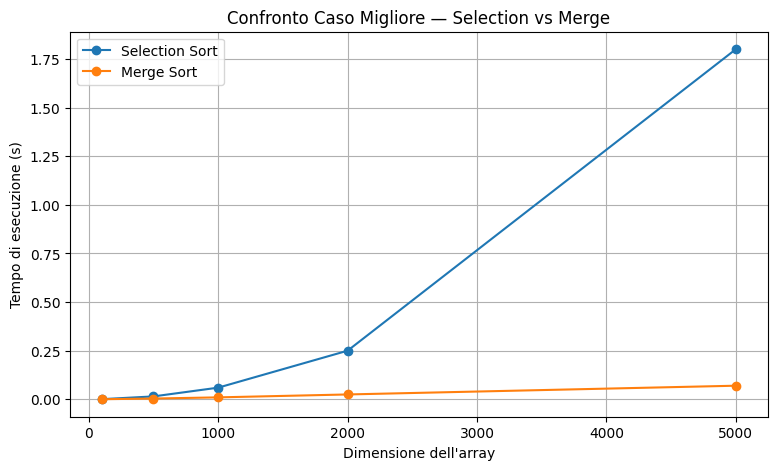

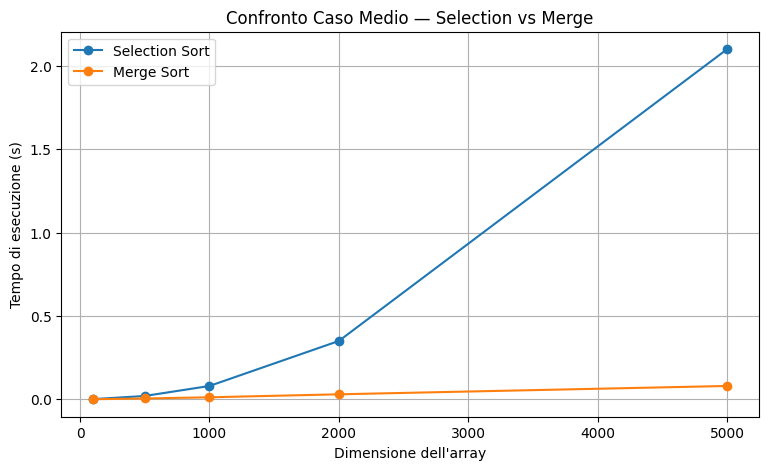

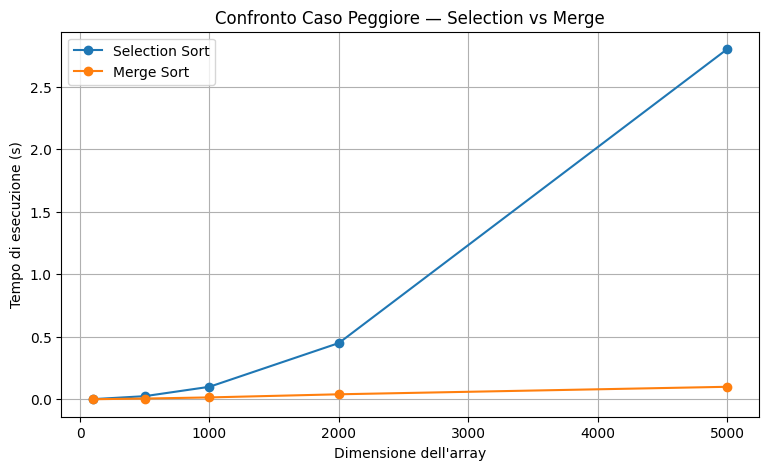

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

sizes = [100, 500, 1000, 2000, 5000]

# ESEMPIO di dati (sostituisci con i tuoi)
# ---- Caso migliore ----
sel_best  = [0.0008, 0.015, 0.06, 0.25, 1.8]
mer_best  = [0.0005, 0.004, 0.010, 0.025, 0.07]

# ---- Caso medio ----
sel_avg   = [0.001, 0.020, 0.08, 0.35, 2.1]
mer_avg   = [0.0005, 0.005, 0.012, 0.030, 0.08]

# ---- Caso peggiore ----
sel_worst = [0.0012, 0.025, 0.10, 0.45, 2.8]
mer_worst = [0.0006, 0.006, 0.015, 0.040, 0.10]


def plot_compare(sel, mer, sizes, title):
    plt.figure(figsize=(9, 5))
    plt.plot(sizes, sel, marker="o", label="Selection Sort")
    plt.plot(sizes, mer, marker="o", label="Merge Sort")
    plt.xlabel("Dimensione dell'array")
    plt.ylabel("Tempo di esecuzione (s)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


# 1) Confronto Caso Migliore
plot_compare(sel_best, mer_best, sizes, "Confronto Caso Migliore — Selection vs Merge")

# 2) Confronto Caso Medio
plot_compare(sel_avg, mer_avg, sizes, "Confronto Caso Medio — Selection vs Merge")

# 3) Confronto Caso Peggiore
plot_compare(sel_worst, mer_worst, sizes, "Confronto Caso Peggiore — Selection vs Merge")


## Confronto tra gli Algoritmi

| **Criterio**               | **Selection Sort**         | **Merge Sort**            |
|-----------------------------|----------------------------|---------------------------|
| **Complessità (caso peggiore)** | O(n²)                     | O(n log n)                |
| **Complessità (caso medio)**    | O(n²)                     | O(n log n)                |
| **Complessità (caso migliore)** | O(n²)                     | O(n log n)                |
| **Stabilità**                  | No                        | Sì                        |
| **Adatto per piccoli array**   | Sì (ma lento)             | Meno efficiente su array molto piccoli |
| **Adatto per grandi array**    | No                        | Sì                        |
| **Paradigma**                  | Iterativo, basato su confronti | Divide et impera, ricorsivo |
| **Uso della memoria**          | In-place (O(1))           | Richiede memoria ausiliaria (O(n)) |


## Conclusioni

I risultati ottenuti confermano le differenze teoriche tra i due algoritmi:
- **Selection Sort** si distingue per la sua semplicità, che lo rende utile in contesti in cui la leggibilità del codice o la memoria sono prioritarie e il dataset è di dimensioni ridotte. Tuttavia, la sua complessità $O(n^2)$ lo penalizza fortemente su dataset di grandi dimensioni, come dimostrato dai tempi di esecuzione misurati.
- **Merge Sort**, grazie alla sua strategia di divide-et-impera, gestisce efficientemente dataset grandi, mantenendo una complessità $O(nlogn)$. Questo vantaggio è evidente nei grafici che mostrano un aumento più contenuto del tempo di esecuzione rispetto a Selection Sort.

Un aspetto importante da considerare è che Merge Sort, pur essendo più veloce, richiede una memoria aggiuntiva per gestire le sue operazioni di fusione. Di conseguenza, la scelta dell'algoritmo dipenderà dal contesto applicativo: per piccoli dataset o sistemi con risorse limitate, Selection Sort potrebbe essere preferibile; per dataset grandi o applicazioni critiche in termini di prestazioni, Merge Sort è una scelta ottimale.

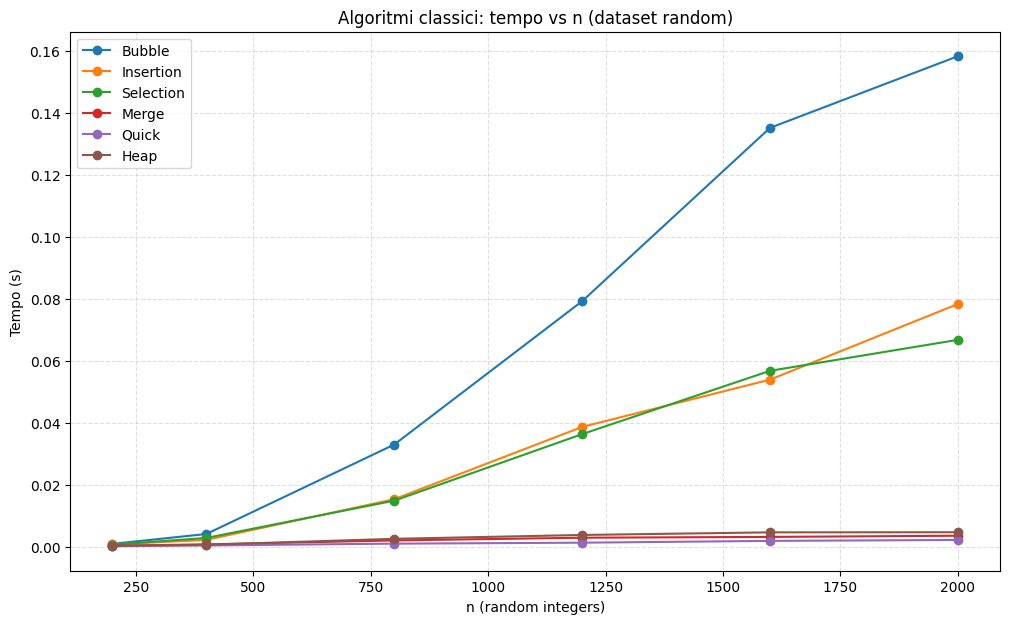

In [12]:
import random
import time
import matplotlib.pyplot as plt

# -----------------------------
# Algoritmi classici
# -----------------------------
def bubble_sort(arr):
    a = arr[:]
    n = len(a)
    for i in range(n):
        for j in range(0, n - i - 1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
    return a

def insertion_sort(arr):
    a = arr[:]
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a

def selection_sort(arr):
    a = arr[:]
    n = len(a)
    for i in range(n):
        m = i
        for j in range(i+1, n):
            if a[j] < a[m]:
                m = j
        a[i], a[m] = a[m], a[i]
    return a

def merge_sort(arr):
    if len(arr) <= 1:
        return arr[:]
    mid = len(arr)//2
    L = merge_sort(arr[:mid])
    R = merge_sort(arr[mid:])
    i = j = 0
    out = []
    while i < len(L) and j < len(R):
        if L[i] <= R[j]:
            out.append(L[i]); i += 1
        else:
            out.append(R[j]); j += 1
    out.extend(L[i:]); out.extend(R[j:])
    return out

def quick_sort(arr):
    a = arr[:]
    def qs(l, r):
        if l >= r: return
        pivot = a[(l+r)//2]
        i, j = l, r
        while i <= j:
            while a[i] < pivot: i += 1
            while a[j] > pivot: j -= 1
            if i <= j:
                a[i], a[j] = a[j], a[i]
                i += 1; j -= 1
        qs(l, j); qs(i, r)
    qs(0, len(a)-1)
    return a

def heap_sort(arr):
    a = arr[:]
    def heapify(n, i):
        largest = i
        l = 2*i + 1
        r = 2*i + 2
        if l < n and a[l] > a[largest]: largest = l
        if r < n and a[r] > a[largest]: largest = r
        if largest != i:
            a[i], a[largest] = a[largest], a[i]
            heapify(n, largest)
    n = len(a)
    for i in range(n//2-1, -1, -1):
        heapify(n, i)
    for i in range(n-1, 0, -1):
        a[0], a[i] = a[i], a[0]
        heapify(i, 0)
    return a

# -----------------------------
# Benchmark
# -----------------------------
def time_algorithm(func, arr):
    start = time.perf_counter()
    func(arr)
    return time.perf_counter() - start

classic_ns = [200, 400, 800, 1200, 1600, 2000]
trials = 3

results = {'Bubble': [], 'Insertion': [], 'Selection': [],
           'Merge': [], 'Quick': [], 'Heap': []}

for n in classic_ns:
    totals = {k: 0.0 for k in results}
    for t in range(trials):
        arr = [random.randint(0, 10000) for _ in range(n)]
        totals['Bubble'] += time_algorithm(bubble_sort, arr)
        totals['Insertion'] += time_algorithm(insertion_sort, arr)
        totals['Selection'] += time_algorithm(selection_sort, arr)
        totals['Merge'] += time_algorithm(merge_sort, arr)
        totals['Quick'] += time_algorithm(quick_sort, arr)
        totals['Heap'] += time_algorithm(heap_sort, arr)
    for k in results:
        results[k].append(totals[k]/trials)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(12,7))
for name, series in results.items():
    plt.plot(classic_ns, series, marker='o', label=name)
plt.title('Algoritmi classici: tempo vs n (dataset random)')
plt.xlabel('n (random integers)')
plt.ylabel('Tempo (s)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


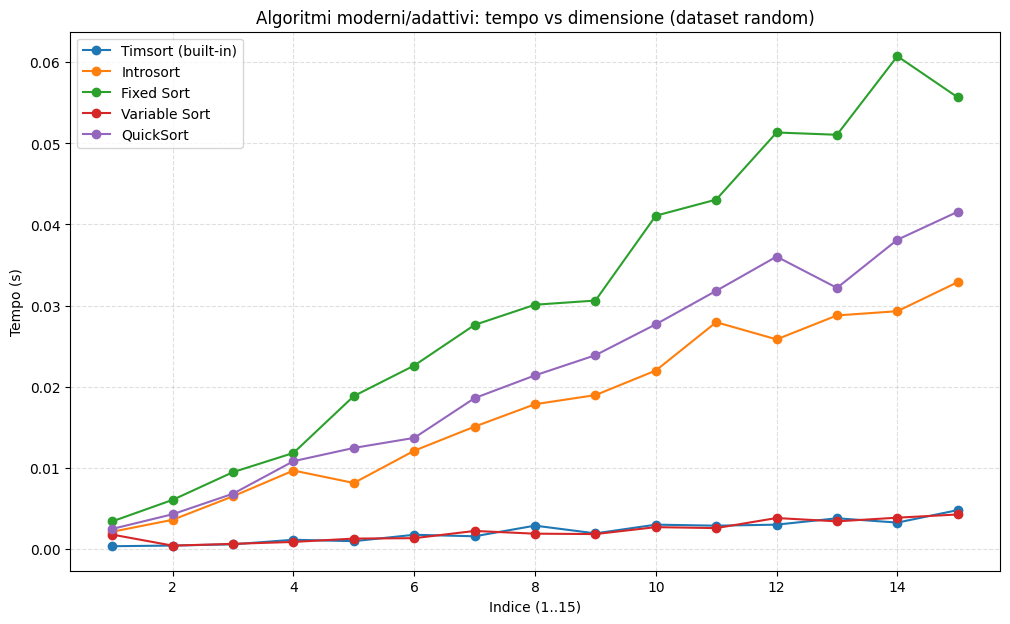

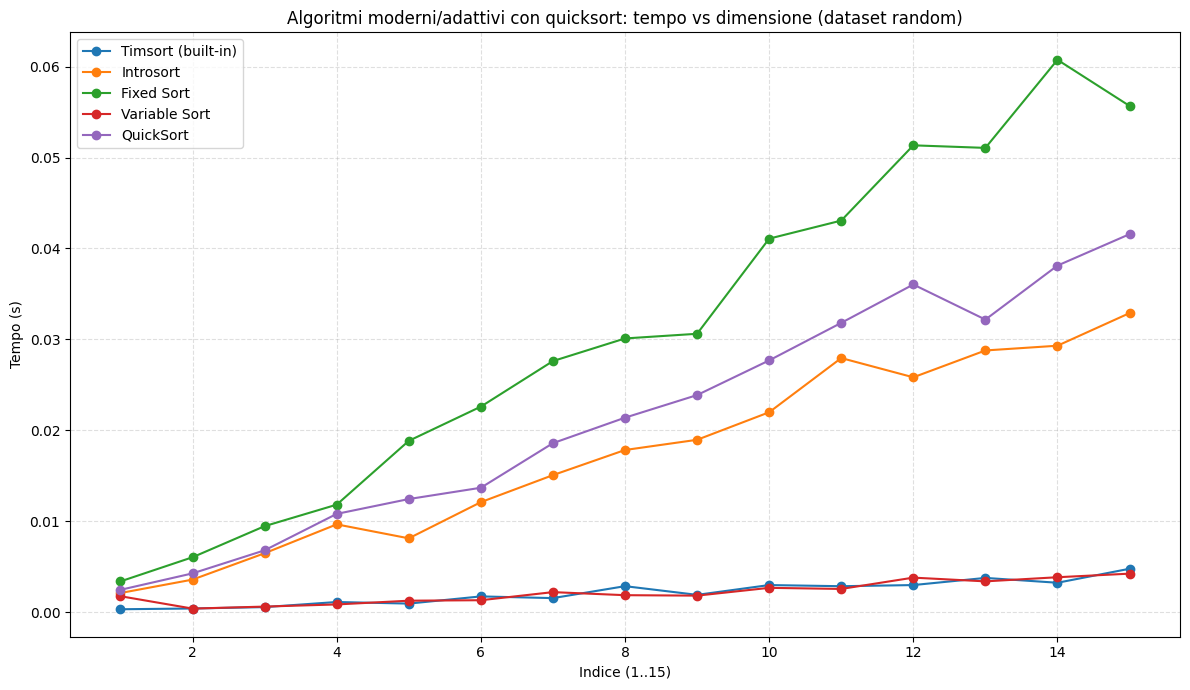

In [13]:
import random
import time
import math
import matplotlib.pyplot as plt

# =========================
#  Algoritmi moderni
# =========================

# --- Timsort (wrapper del built-in) ---
def timsort_sort(arr):
    return sorted(arr)

# --- Introsort: Quick + Heap fallback + Insertion per sottosequenze piccole ---
def introsort(arr):
    a = arr[:]
    n = len(a)
    if n < 2:
        return a
    maxdepth = int(2 * math.log2(n)) if n > 0 else 0

    def _heapsort(lo, hi):
        m = hi - lo
        def heapify(i, size):
            while True:
                l, r = 2*i+1, 2*i+2
                largest = i
                if l < size and a[lo+l] > a[lo+largest]: largest = l
                if r < size and a[lo+r] > a[lo+largest]: largest = r
                if largest == i: break
                a[lo+i], a[lo+largest] = a[lo+largest], a[lo+i]
                i = largest
        for i in range(m//2-1, -1, -1):
            heapify(i, m)
        for end in range(m-1, 0, -1):
            a[lo], a[lo+end] = a[lo+end], a[lo]
            heapify(0, end)

    def _insertion(lo, hi):
        for i in range(lo+1, hi):
            key = a[i]; j = i-1
            while j >= lo and a[j] > key:
                a[j+1] = a[j]; j -= 1
            a[j+1] = key

    def _partition(lo, hi):
        pivot = a[lo + (hi-lo)//2]
        i, j = lo, hi-1
        while True:
            while a[i] < pivot: i += 1
            while a[j] > pivot: j -= 1
            if i >= j: return j
            a[i], a[j] = a[j], a[i]
            i += 1; j -= 1

    def _introsort(lo, hi, depth):
        while hi - lo > 16:
            if depth == 0:
                _heapsort(lo, hi)
                return
            depth -= 1
            p = _partition(lo, hi)
            _introsort(p+1, hi, depth)
            hi = p+1
        _insertion(lo, hi)

    _introsort(0, n, maxdepth)
    return a

# --- FixedSort: rete di confronto fissa su blocchi da 8 + merge bottom-up ---
def fixed_sort(arr):
    a = arr[:]
    n = len(a)
    if n < 2:
        return a

    comps = [
        (0,1),(2,3),(4,5),(6,7),
        (0,2),(1,3),(4,6),(5,7),
        (1,2),(5,6),
        (0,4),(1,5),(2,6),(3,7),
        (2,4),(3,5),
        (1,2),(3,4),(5,6),
    ]

    def sort8_block(lo):
        length = min(8, n - lo)
        for i,j in comps:
            if i < length and j < length and a[lo+i] > a[lo+j]:
                a[lo+i], a[lo+j] = a[lo+j], a[lo+i]

    for lo in range(0, n, 8):
        sort8_block(lo)

    def merge(lo, mid, hi):
        L = a[lo:mid]; R = a[mid:hi]
        i = j = 0; k = lo
        while i < len(L) and j < len(R):
            if L[i] <= R[j]: a[k] = L[i]; i += 1
            else:            a[k] = R[j]; j += 1
            k += 1
        while i < len(L): a[k] = L[i]; i += 1; k += 1
        while j < len(R): a[k] = R[j]; j += 1; k += 1

    size = 8
    while size < n:
        for lo in range(0, n, 2*size):
            mid = min(lo+size, n)
            hi  = min(lo+2*size, n)
            merge(lo, mid, hi)
        size *= 2
    return a

# --- VariableSort: selezione adattiva ---
def _is_nearly_sorted_sample(arr, sample=64, threshold_ratio=0.04):
    n = len(arr)
    if n < 2: return True
    sample = min(sample, n-1)
    inversions = 0
    trials = sample
    step = max(1, n // sample)
    for i in range(0, n-1, step):
        if arr[i] > arr[i+1]:
            inversions += 1
    return inversions / trials <= threshold_ratio

def variable_sort(arr):
    n = len(arr)
    if n <= 32:
        a = arr[:]
        for i in range(1, len(a)):
            key = a[i]; j = i-1
            while j >= 0 and a[j] > key:
                a[j+1] = a[j]; j -= 1
            a[j+1] = key
        return a
    if _is_nearly_sorted_sample(arr):
        return sorted(arr)
    if n <= 2048:
        return introsort(arr)
    return sorted(arr)

# --- QuickSort semplice ---
def quicksort(arr):
    a = arr[:]
    def _quicksort(lo, hi):
        if lo < hi:
            p = partition(lo, hi)
            _quicksort(lo, p-1)
            _quicksort(p+1, hi)

    def partition(lo, hi):
        pivot = a[hi]
        i = lo - 1
        for j in range(lo, hi):
            if a[j] <= pivot:
                i += 1
                a[i], a[j] = a[j], a[i]
        a[i+1], a[hi] = a[hi], a[i+1]
        return i+1

    _quicksort(0, len(a)-1)
    return a

# =========================
#  Benchmark
# =========================
def time_algorithm(func, arr):
    start = time.perf_counter()
    func(arr)
    return time.perf_counter() - start

# dimensioni X: da 1 a 15
x_labels = list(range(1, 16))
modern_ns = [k*2000 for k in x_labels]   # dimensioni reali

trials = 3
results = {
    "Timsort (built-in)": [],
    "Introsort": [],
    "Fixed Sort": [],
    "Variable Sort": [],
    "QuickSort": [],
}

for n in modern_ns:
    totals = {k: 0.0 for k in results}
    for _ in range(trials):
        arr = [random.randint(0, 1_000_000) for _ in range(n)]
        totals["Timsort (built-in)"] += time_algorithm(timsort_sort, arr)
        totals["Introsort"]          += time_algorithm(introsort, arr)
        totals["Fixed Sort"]         += time_algorithm(fixed_sort, arr)
        totals["Variable Sort"]      += time_algorithm(variable_sort, arr)
        totals["QuickSort"]          += time_algorithm(quicksort, arr)
    for k in results:
        results[k].append(totals[k] / trials)

# =========================
#  Plot
# =========================
plt.figure(figsize=(12,7))
for name, series in results.items():
    plt.plot(x_labels, series, marker='o', label=name)
plt.title('Algoritmi moderni/adattivi: tempo vs dimensione (dataset random)')
plt.xlabel('Indice (1..15)')
plt.ylabel('Tempo (s)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()
# Plot e salva immagine
plt.figure(figsize=(12, 7))
for name, series in results.items():
    plt.plot(x_labels, series, marker='o', label=name)
plt.title('Algoritmi moderni/adattivi con quicksort: tempo vs dimensione (dataset random)')
plt.xlabel('Indice (1..15)')
plt.ylabel('Tempo (s)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# Salva l'immagine come file PNG
plt.savefig("grafico_sort_finale.png")
plt.show()


In [ ]:
import random
import time
import matplotlib.pyplot as plt

# -----------------------------
# Algoritmi di ricerca
# -----------------------------
def linear_search(arr, x):
    for i, v in enumerate(arr):
        if v == x:
            return i
    return -1

def binary_search(arr, x):
    l, r = 0, len(arr) - 1
    while l <= r:
        mid = (l + r) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            l = mid + 1
        else:
            r = mid - 1
    return -1

# -----------------------------
# BST bilanciato da array ordinato
# -----------------------------
class Node:
    __slots__ = ("key", "left", "right")
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

def build_balanced_bst(sorted_arr):
    """Costruisce un BST bilanciato scegliendo sempre il medio."""
    if not sorted_arr:
        return None
    # uso iterativo per evitare ricorsione profonda (anche se qui sarebbe log n)
    stack = [(0, len(sorted_arr) - 1, None, None)]  # (L, R, parent, is_left)
    root = None
    nodes = {}
    while stack:
        L, R, parent, is_left = stack.pop()
        if L > R:
            continue
        m = (L + R) // 2
        node = Node(sorted_arr[m])
        nodes[m] = node
        if parent is None:
            root = node
        else:
            if is_left:
                parent.left = node
            else:
                parent.right = node
        # prima push right, poi left per creare prima il sinistro (LIFO)
        stack.append((m + 1, R, node, False))
        stack.append((L, m - 1, node, True))
    return root

def bst_search_iter(root, x):
    cur = root
    while cur is not None:
        if x == cur.key:
            return cur
        cur = cur.left if x < cur.key else cur.right
    return None

# -----------------------------
# Benchmark
# -----------------------------
def time_algorithm(func, *args):
    start = time.perf_counter()
    func(*args)
    return time.perf_counter() - start

ns = [500, 1000, 2000, 4000, 8000, 16000]
trials = 5

results = {"Lineare": [], "Binaria": [], "BST (bilanciato)": []}

for n in ns:
    totals = {k: 0.0 for k in results}
    for _ in range(trials):
        # dataset ordinato per binaria/BST
        arr = sorted(random.sample(range(n * 10), n))
        target = random.choice(arr)

        # Linear
        totals["Lineare"] += time_algorithm(linear_search, arr, target)

        # Binary
        totals["Binaria"] += time_algorithm(binary_search, arr, target)

        # BST bilanciato (costruzione fuori dal timing della ricerca)
        root = build_balanced_bst(arr)
        totals["BST (bilanciato)"] += time_algorithm(bst_search_iter, root, target)

    for k in results:
        results[k].append(totals[k] / trials)

# -----------------------------
# Plot (lineare)
# -----------------------------
plt.figure(figsize=(11, 6))
for name, series in results.items():
    plt.plot(ns, series, marker='o', label=name)
plt.title('Confronto algoritmi di ricerca: tempo vs n (dataset random, array ordinato)')
plt.xlabel('Dimensione n')
plt.ylabel('Tempo medio (s)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# (Opzionale) Plot log-log per evidenziare gli andamenti asintotici
plt.figure(figsize=(11, 6))
for name, series in results.items():
    plt.loglog(ns, series, marker='o', label=name, basex=2, basey=10)
plt.title('Confronto (scala log-log)')
plt.xlabel('n')
plt.ylabel('Tempo (s)')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
